1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


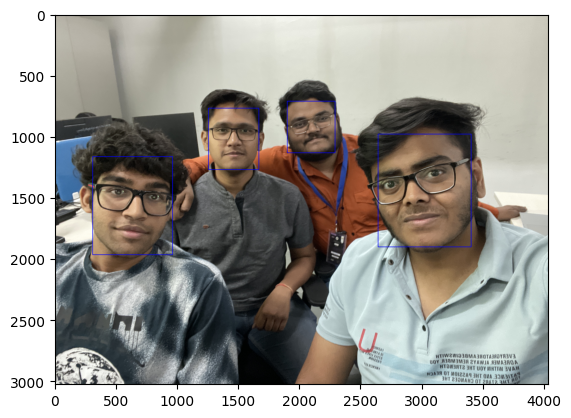

In [18]:
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt 

img = cv2.imread('./test_images/group.jpg')

# Create an MTCNN detector
detector = MTCNN()

# Detect faces
faces = detector.detect_faces(img)

# Draw rectangles around faces
count = 0;
for face in faces:
    x, y, w, h = face['box']
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 4)
    roi_color = img[y:y+h, x:x+w]

    cv2.imwrite(f"./faces/face_{count}.jpg", roi_color)
    count += 1

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()


In [19]:
import pickle
import pywt
import os
import numpy as np

model = pickle.load(open("model.pkl", "rb"))

In [20]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    imArray =  np.float32(imArray)   
    imArray /= 255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [21]:
def classify_image_direct(img): # Modified to accept an image directly
    if img is None:
        return []  

    scalled_raw_img = cv2.resize(img, (32, 32))
    img_har = w2d(img, 'db1', 5)  # Assuming you have the w2d function defined
    scalled_img_har = cv2.resize(img_har, (32, 32))
    combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))

    len_img_array = 32*32*3 + 32*32

    final = combined_img.reshape(1, len_img_array).astype('float')

    return model.predict(final)  # Assuming you have a model loaded 

# Main processing
faces_dir = "./faces"  # Path to your faces directory 

for filename in os.listdir(faces_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image files
        file_path = os.path.join(faces_dir, filename)
        img = cv2.imread(file_path)  

        prediction = classify_image_direct(img)   
        print(f"Predictions for {filename}: {prediction}") 


Predictions for face_0.jpg: [0]
Predictions for face_1.jpg: [0]
Predictions for face_2.jpg: [0]
Predictions for face_3.jpg: [0]
